<a href="https://colab.research.google.com/github/apolanco3225/Generative-Deep-Learning/blob/master/GDL_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# FIRST CONVOLUTIONAL NEURAL NETWORK
import numpy as np
from keras.layers import Input, Flatten, Dense, Dropout, Activation
from keras.layers import Dense, Conv2D, BatchNormalization, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K
from keras.datasets import cifar10


Using TensorFlow backend.


In [2]:
num_classes = 10
(trainX, trainY), (testX, testY) = cifar10.load_data()

170500096/170498071 [==============================] - 10s 0us/step


In [0]:
# image pre processing
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

trainY = to_categorical(trainY, num_classes)
testY = to_categorical(testY, num_classes)

In [4]:
# NN architecture
input_layer = Input(shape=(32, 32, 3))

conv_layer_1 = Conv2D(filters=10, kernel_size=(4, 4), strides=2, padding='same')(input_layer)
conv_layer_2 = Conv2D(filters=20, kernel_size=(3, 3), strides=2, padding='same')(conv_layer_1)
flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation='softmax')(flatten_layer)
model = Model(input_layer, output_layer)

W0904 14:11:39.382040 139967882549120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 14:11:39.421135 139967882549120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 14:11:39.432062 139967882549120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [7]:
# another CNN architecture
input_layer = Input((32, 32, 3))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(num_classes)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

W0904 14:25:44.360620 139967882549120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0904 14:25:44.361804 139967882549120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0904 14:25:47.866942 139967882549120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0904 14:25:48.312057 139967882549120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future ve

In [8]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1849

In [9]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


W0904 14:26:59.820375 139967882549120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [11]:
model.fit(trainX, trainY, batch_size=32, epochs=10, shuffle=True, validation_data=(testX, testY))

W0904 14:27:47.619830 139967882549120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 37s 738us/step - loss: 1.4707 - acc: 0.4868 - val_loss: 1.1808 - val_acc: 0.5927
Epoch 2/10
50000/50000 [==============================] - 32s 633us/step - loss: 1.0359 - acc: 0.6406 - val_loss: 0.9429 - val_acc: 0.6666
Epoch 3/10
50000/50000 [==============================] - 32s 635us/step - loss: 0.9185 - acc: 0.6787 - val_loss: 0.9921 - val_acc: 0.6522
Epoch 4/10
50000/50000 [==============================] - 32s 631us/step - loss: 0.8386 - acc: 0.7099 - val_loss: 1.0902 - val_acc: 0.6196
Epoch 5/10
50000/50000 [==============================] - 31s 626us/step - loss: 0.7716 - acc: 0.7302 - val_loss: 1.0266 - val_acc: 0.6476
Epoch 6/10
50000/50000 [==============================] - 31s 627us/step - loss: 0.6992 - acc: 0.7549 - val_loss: 0.9374 - val_acc: 0.6811
Epoch 7/10
50000/50000 [==============================] - 31s 626us/step - loss: 0.6416 - acc: 0.7738 - val_loss: 1.

In [13]:
model.layers[6].get_weights()

[array([[[[-0.16874596, -0.07454356, -0.09294762, ...,  0.03747098,
            0.05737407, -0.11392178],
          [-0.09682187,  0.0234166 , -0.02104536, ...,  0.25793368,
            0.09711816,  0.08387993],
          [ 0.05903518, -0.07196845,  0.02688006, ..., -0.01226843,
           -0.19088559,  0.06129375],
          ...,
          [-0.03204846,  0.04028217,  0.08541503, ..., -0.08813883,
           -0.02647549,  0.03857784],
          [ 0.00656859,  0.07288129,  0.0655026 , ...,  0.03667876,
            0.01033527,  0.03916325],
          [ 0.01662426, -0.02142862, -0.10717929, ...,  0.04140985,
            0.1029029 , -0.11249506]],
 
         [[-0.09494453, -0.11544105, -0.02323138, ...,  0.01513403,
            0.12044539, -0.03649243],
          [-0.08048934, -0.13990897,  0.03225687, ...,  0.2188712 ,
           -0.06415912,  0.10381851],
          [-0.1081557 , -0.0746338 ,  0.17458563, ..., -0.0023282 ,
            0.02164363,  0.05985609],
          ...,
          [-0

In [14]:
model.evaluate(testX, testY, batch_size=1000)

10000/10000 [==============================] - 2s 208us/step


[0.959362941980362, 0.6887999951839447]

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(testX)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(testY, axis=-1 )]

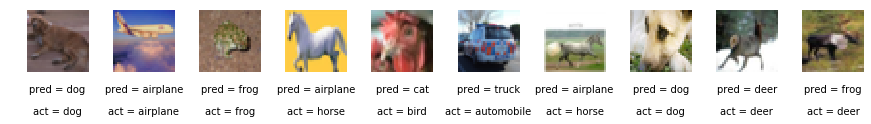

In [21]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(testX)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = testX[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = '+ str(preds_single[idx]), fontsize=10, ha='center',
         transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', 
         transform=ax.transAxes)
  ax.imshow(img)